In [32]:
import pandas as pd
import numpy as np
import re
import nltk
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sea
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from prettytable import PrettyTable
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import confusion_matrix
#from wordcloud import WordCloud, STOPWORDS
#from PIL import Image

import warnings
warnings.filterwarnings('ignore')

### Loading training set

In [33]:
path = "/Users/ankusmanish/Downloads/aclImdb/"
#Loading training set
train_positiveFiles = [x for x in os.listdir(path+"train/pos/") if x.endswith(".txt")]
train_negativeFiles = [x for x in os.listdir(path+"train/neg/") if x.endswith(".txt")]
#Loading testing set
test_positiveFiles = [x for x in os.listdir(path+"test/pos/") if x.endswith(".txt")]
test_negativeFiles = [x for x in os.listdir(path+"test/neg/") if x.endswith(".txt")]

In [34]:
#Training
positiveReviews_train, negativeReviews_train = [], []
for pfile in train_positiveFiles:
    with open(path+"train/pos/"+pfile, encoding="latin1") as f:
        positiveReviews_train.append(f.read())
for nfile in train_negativeFiles:
    with open(path+"train/neg/"+nfile, encoding="latin1") as f:
        negativeReviews_train.append(f.read())
#Testing
positiveReviews_test, negativeReviews_test = [], []
for pfile in test_positiveFiles:
    with open(path+"test/pos/"+pfile, encoding="latin1") as f:
        positiveReviews_test.append(f.read())
for nfile in test_negativeFiles:
    with open(path+"test/neg/"+nfile, encoding="latin1") as f:
        negativeReviews_test.append(f.read())

In [35]:
#Training
train_reviews = pd.concat([
    pd.DataFrame({"review":positiveReviews_train, "label":1}),
    pd.DataFrame({"review":negativeReviews_train, "label":0})
], ignore_index=True).sample(frac=1, random_state=1)

#Testing
test_reviews = pd.concat([
    pd.DataFrame({"review":positiveReviews_test, "label":1}),
    pd.DataFrame({"review":negativeReviews_test, "label":0})
], ignore_index=True).sample(frac=1, random_state=10)

In [36]:
test_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 18634 to 17673
Data columns (total 2 columns):
review    25000 non-null object
label     25000 non-null int64
dtypes: int64(1), object(1)
memory usage: 585.9+ KB


In [37]:
train_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 21492 to 235
Data columns (total 2 columns):
review    25000 non-null object
label     25000 non-null int64
dtypes: int64(1), object(1)
memory usage: 585.9+ KB


In [38]:
train_reviews.head()

,review,label
21492,"Hubert Selby Jr. gave us the book ""Requiem For...",0
9488,There are very few performers today who can ke...,1
16933,C'mon guys some previous reviewers have nearly...,0
12604,The movie has several story lines that follow ...,0
8222,"don't mind the soundtrack, which is played out...",1


In [39]:
test_reviews.head()

,review,label
18634,Alexandra Ripley wrote a horrible sequel to Ma...,0
1333,This movie was release when I was 15 and I cou...,1
20315,Have you seen all the big adventures of last f...,0
6357,I was into the movie right away. I've seen the...,1
10496,"This is a thoroughly enjoyable, well-acted fil...",1


In [40]:
train_text = train_reviews['review'].values

In [41]:
train_text_data = []

for i in range(len(train_text)):
    review = train_text[i].lower()
    
    review = re.sub('[^a-z]+', ' ',review)
    
    ps = PorterStemmer()
    
    review = [ps.stem(i) for i in word_tokenize(review) if i not in stopwords.words('english')]
    
    review = ' '.join(review)
    
    train_text_data.append(review)

In [43]:
cv = CountVectorizer()
X_train = cv.fit_transform(train_text_data).toarray()
y_train = train_reviews['label'].values

In [44]:
len(cv.get_feature_names())

49638

In [45]:
test_text = test_reviews['review'].values

In [46]:
test_text_data = []

for i in range(len(test_text)):
    review = test_text[i].lower()
    
    review = re.sub('[^a-z]+', ' ',review)
    
    ps = PorterStemmer()
    
    review = [ps.stem(i) for i in word_tokenize(review) if i not in stopwords.words('english')]
    
    review = ' '.join(review)
    
    test_text_data.append(review)

In [47]:
X_test = cv.transform(test_text_data).toarray()
y_test = test_reviews['label'].values

In [48]:
len(X_test[0])

49638

In [49]:
def model(X_train, y_train, X_test, y_test):
    classification_algos = {'MultinomialNB': MultinomialNB()}
    
    best_classifier = {'obj':0, 'accuracy': 0}
    
    t = PrettyTable(['Algorithms', 'Accuracy'])
    for key, model in classification_algos.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        t.add_row([key, accuracy_score(y_test, y_pred)])
        
        sea.heatmap(confusion_matrix(y_test, y_pred), annot = True, cmap = 'summer')
        plt.title(key, pad = 15)
        plt.show()
        
        if accuracy_score(y_test, y_pred) > best_classifier['accuracy']:
            best_classifier['obj'] = model
            best_classifier['accuracy'] = accuracy_score(y_test, y_pred)
            
    print(t)
    return best_classifier['obj']

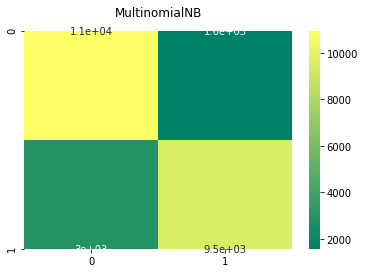

+---------------+----------+
|   Algorithms  | Accuracy |
+---------------+----------+
| MultinomialNB | 0.81856  |
+---------------+----------+


In [50]:
best_classifier = model(X_train, y_train, X_test, y_test)